**Laboratory work #2**

Team #17: Marta Sumyk and Mykhailo Byleshnyi.

Distribution of work:
- LZW: Marta Sumyk
- LZ77: Mykhailo Byleshnyi
- Huffman and Deflate: together




In [1]:
#Importing all the necessary libraries:
import time
import random
import string
import numpy
import doctest
from typing import List
import matplotlib.pyplot as plt

**LZW algorithm:**

Complexity:

n - length of the input string

Encoding - O(n)

Decoding - O(n^2) - worst case, but in many cases it`s O(n)

In [3]:
class Lzw:
    '''
    Class to perform LZW encoding and decoding.
    >>> text = Lzw('abacabadabacacacd')
    >>> text.encode()
    [0, 1, 0, 2, 4, 0, 3, 8, 7, 12, 3]
    >>> 'abacabadabacacacd' == text.decode([0, 1, 0, 2, 4, 0, 3, 8, 7, 12, 3])
    True
    '''
    def __init__(self, data):
        '''
        Initialize the data.
        '''
        self.data = data

    def encode(self):
        '''
        The main method to encode LZW code.
        Returns list with code.
        >>> text = Lzw('aaabbbbcccc')
        >>> text.encode()
        [0, 3, 1, 5, 1, 2, 8, 2]
        '''
        #Variable to store result:
        code = []
        #List to store the symbols that are already in dictionary:
        symbols = []
        for ch in self.data:
            if ch not in symbols:
                symbols.append(ch)
        #String to store what we have read:
        read = ''
        for symbol in self.data:
            with_next = read + symbol
            #If string with symbol is already in dict, we should take next symbol:
            if with_next in symbols:
                read = with_next
            else:
                code.append(symbols.index(read))
                symbols.append(with_next)
                read = symbol
        if read in symbols:
            code.append(symbols.index(read))
        return code

    def decode(self, code: list):
        '''
        The LZW decoding.
        '''
        result = []
        symbols = []
        #Forming a set of characters:
        for ch in self.data:
            if ch not in symbols:
                symbols.append(ch)
        #Previous string added to the result:
        previous = ''
        for i in code:
            if i < len(symbols):
                if len(result) != 0:
                    previous = result[-1]
                    symbols.append(previous + (symbols[i])[0])
                result.append(symbols[i])
            if i == len(symbols):
                if len(result) != 0:
                    previous = result[-1]
                    symbols.append(previous + previous[0])
                result.append(previous + previous[0])
            elif i > len(symbols):
                if len(result) != 0:
                    previous = result[-1]
                new_str = previous + (symbols[i])[0]
                symbols.append(new_str)
                result.append(new_str)
        return ''.join(result)

Function to open file on which we`ll be testing our algorithms:

In [4]:
def open_file(file_name: str):
  '''
  Opens txt file and returns it ad a string.
  '''
  with open(file_name, encoding='utf-8') as file:
    text = file.read()
  return text

Now let`s calculate the compression coefficient of the above algorithm:

In [5]:
def compression_coefficient(data, code):
    '''
    Calculates the compression coefficient (in percents) for the LZW algorithm.
    '''
    #First we turn our code to bytearray:
    code = bytearray(code)
    code_size = len(code)
    data_size = len(data) * 8
    return 100 - code_size / data_size * 100

text = open_file('ChornaRada.txt')
object = Lzw(text)
code = text.encode()
result = compression_coefficient(text, code)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'ChornaRada.txt'

Now let`s test the time on the 'Introduction to algorithms' Cormen book.

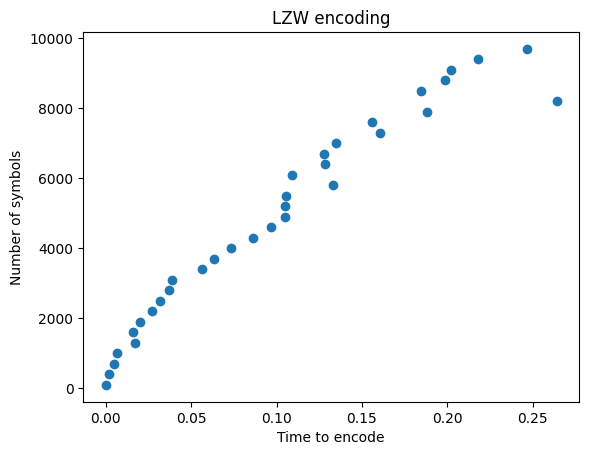

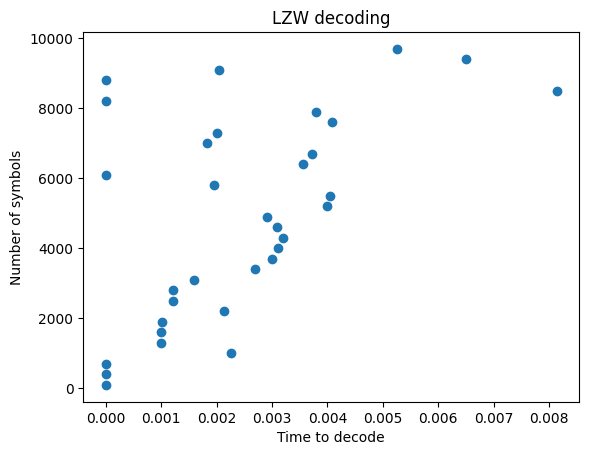

So we can see that time that LZW algorithm takes to decode and encode data almost linearly depends on the size of input data.


In [39]:
def analyze_lzw():
  '''
  Function to measure time and build graphics of the LZW algorithm.
  '''
  data = open_file('text.txt')
  encoded = []
  decoded = []
  text = []
  number_of_ch = [i for i in range(100, 10000, 300)]
  for k in number_of_ch:
    string1 = data[:k]
    text.append(string1)

  for data in text:
    #Initialize the object of class Lzw:
    text_to_code = Lzw(data)

    #Measuring time of encoding:
    start1 = time.time()
    encoding = text_to_code.encode()
    end1 = time.time()
    time_encode = end1 - start1

    encoded.append(time_encode)

    #Measuring the time of decoding:
    start2 = time.time()
    decoding = text_to_code.decode(encoding)
    end2 = time.time()
    time_decode = end2 - start2
    decoded.append(time_decode)

  #Visualization of the result:
  #Encoding:
  x = encoded
  y = number_of_ch
  plt.scatter(x, y)
  plt.xlabel("Time to encode")
  plt.ylabel("Number of symbols")
  plt.title("LZW encoding")
  plt.show()
  
  #Decoding:
  x = decoded
  y = number_of_ch
  plt.scatter(x, y)
  plt.xlabel("Time to decode")
  plt.ylabel("Number of symbols")
  plt.title("LZW decoding")
  plt.show()
  return f'So we can see that time that LZW algorithm takes to decode and encode data almost linearly depends on the size of input data.'

print(analyze_lzw())


**Conclusion:**

LZW is a 'dictionary-based' algorithm that scans the imput data for patterns that appear more than once.

To show this we can also take two small strings: one with elements that repeat and other with all unique elements:

In [40]:
with_repeat = 'aababacaccabbcabbacbabbabab'
unique = 'hjklsdfaoiqweo[;],zvwo/.qxw'

#Check if the data is the same size:
print(len(with_repeat) == len(unique))

#Initializing objects of class LZW:
with_repeat = Lzw(with_repeat)
unique = Lzw(unique)

code_with_repeat = with_repeat.encode()
code_unique = unique.encode()

print(len(code_with_repeat))
print(len(code_unique))

True
17
27


So, we can see that even on such small amount of data LZW algorithm works much more better with data that has repetitions.

**Huffman code algorithm:**

Compexity:
n - Довжина вхідних данних
### calculate_frequency = O(n)
### encode_start = O(n^2)
### encode(закодування самого повідомлення) = O(n)
### decode = O(n)

In [51]:
class HuffmanCode:
    """
    Huffman code encode and decoder.
    """

    def __init__(self, data: str):
        """
        Initialize the data.
        """
        self.data = data
        self.probabilities = []
        self.code = ""
        self.code_dict = {}

    def calculate_frequency(self) -> list:
        """
        Helper method to calculate frequency of the characters.
        >>> text = HuffmanCode("aaaaabbbbbffffhhhrro")
        >>> sorted(text.calculate_frequency())
        [[0.05, '', 'o'], [0.1, '', 'r'], [0.15, '', 'h'], [0.2, '', 'f'], [0.25, '', 'a'], [0.25, '', 'b']]
        >>> text = HuffmanCode("aaaaaaaaa")
        >>> sorted(text.calculate_frequency())
        [[1.0, '', 'a']]
        """
        characters = set()
        for i in self.data:
            characters.add(i)
        result = []
        for ch in characters:
            self.probabilities.append([ch, (self.data.count(ch))/len(self.data)])
            result.append([(self.data.count(ch))/len(self.data), '', ch])
        return result

    def encode_start(self, list_l):
        """
        Main method to encode the string to Huffman code.
        Returns list of lists, where the first element of each sublist is probability of the letter
        and the second is it`s code.
        >>> text = HuffmanCode("aaaaabbbb")
        >>> prb = text.calculate_frequency() 
        >>> text.encode_start(prb)
        [[0.4444444444444444, '0', 'b'], [0.5555555555555556, '1', 'a']]
        >>> text = HuffmanCode("a")
        >>> prb = text.calculate_frequency() 
        >>> text.encode_start(prb)
        [[1.0, '1', 'a']]
        >>> text = HuffmanCode("")
        >>> prb = text.calculate_frequency() 
        >>> text.encode_start(prb)
        []
        """
        if len(list_l)==0:
            return []
        if len(list_l)==1:
            list_l[0][1]="1"
            return list_l
        if len(list_l) > 2:
            list_l = sorted(list_l, key=lambda x: x[0], reverse=True)
            last_1 = list_l[-1]
            last_2 = list_l[-2]
            summary = [last_1[0] + last_2[0], "", "", last_1[-1] + last_2[-1]]
            list_l = list_l[:-2] + [summary]
            list_l = self.encode_start(list_l)
            list_l = sorted(list_l, key=lambda x: x[0])
            for i in list_l:
                try:
                    if i[-1] == last_1[-1] + last_2[-1]:
                        last_1[1] = i[1] + "0"
                        last_2[1] = i[1] + "1"
                        list_l.remove(i)
                        list_l.append(last_1)
                        list_l.append(last_2)
                        break
                except IndexError:
                    continue
            self.code_dict = list_l
            return list_l
        #If lenght of the list is 2 than we can assign codes:
        else:
            list_l = sorted(list_l, key=lambda x: x[0])
            list_l[0][1] = "0"
            list_l[1][1] = "1"
            return list_l

    def encode(self):
        """
        Returns the code string.
        """
        buf = self.data
        for i in self.code_dict:
            buf = (buf).replace(i[2], i[1])
        self.code = buf
        return self.code

    def decode(self):
        """
        Decoding the Huffman code.
        """
        result = ''
        dicti = dict()
        for j in self.code_dict:
            dicti[j[1]] = j[2]
        now = ''
        for i in self.code:
            now += i
            if now in dicti:
                result += dicti[now]
                now = ''
        result = result.replace('¡', '0')
        result = result.replace('#', '1')
        return result

Now let`s also calculate the compression coefficient of the above algorithm:

In [52]:
def compression_coefficient_huffman(data, code):
    '''
    Calculates the compression coefficient (in percents) for the LZW algorithm.
    '''
    #First we turn our code to bytearray:
    byte = [int(i) for i in code]
    bytearray_ = bytearray(byte)
    code_size = len(bytearray_)
    data_size = getsizeof(data)
    return code_size / data_size * 100

text = open_file('ChornaRada.txt')
object = HuffmanCode(text)
prob = object.calculate_frequency()
code = object.encode_start(prob)
encoded = object.encode()
result = compression_coefficient_huffman(text, encoded)
print(result)

243.06270553581476


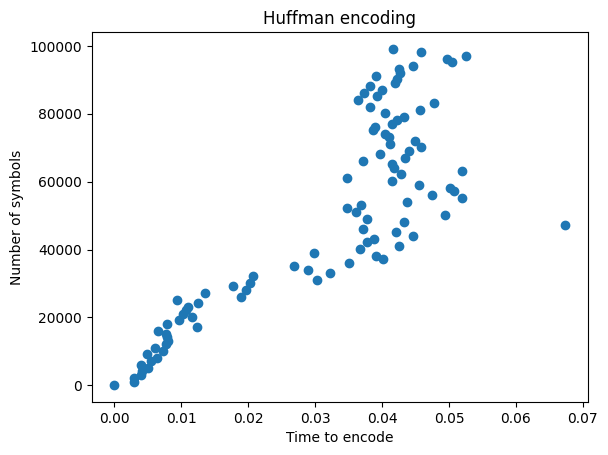

So we can see that time that Huffman code algorithm takes to encode data also almost linearly depends on the size of input data. 


In [53]:
def analyze_huffman():
    '''
    Function to measure time and build graphics of Huffman algorithm.
    '''
    encoded = []
    decoded = []
    text = []
    number_of_ch = [i for i in range(100, 100000, 1000)]
    data = open_file('text.txt')
    for k in number_of_ch:
        string1 = data[:k]
        text.append(string1)
    for data in text:
        start1 = time.time()
        to_code = HuffmanCode(data)
        prob = to_code.calculate_frequency()
        code = to_code.encode_start(prob)
        encode = to_code.encode()
        end1 = time.time()
        time_to_encode = end1 - start1
        encoded.append(time_to_encode)

    #Visualization of the result:
    #Encoding:
    x = encoded
    y = number_of_ch
    plt.scatter(x, y)
    plt.xlabel("Time to encode")
    plt.ylabel("Number of symbols")
    plt.title("Huffman encoding")
    plt.show()

    return 'So we can see that time that Huffman code algorithm takes\
 to encode data also almost linearly depends on the size of input data. '

print(analyze_huffman())

    

**Conclusion:**

The code length is related to how frequently characters are used. Most frequent characters have the smallest codes and longer codes for least frequent characters. Complexity for assigning the code for each character according to their frequency is O(n log n). 

Huffman code will work better, if we have less range of different symbols.

**LZ77 algorithm:**

In [64]:
class Lz77:
    """
    Lz77 Compressing method
    """
    def __init__(self,text: str, search_block_len: int, front_block_len: int) -> None:
        self.text=text
        self.search_block_len=search_block_len
        self.front_block_len=front_block_len
        self.coded_message=[]

    def lz77_encode(self) -> List[tuple]:
        """
        Lz77 encoding.
        >>> text1=Lz77("aaaa",0,0)
        >>> text1.lz77_encode()
        [(0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a')]
        >>> text1= Lz77("aaaa",1,1)
        >>> text1.lz77_encode()
        [(0, 0, 'a'), (1, 1, 'a'), (1, 1, '')]
        >>> text1=Lz77("abacabacabac",5,5)
        >>> text1.lz77_encode()
        [(0, 0, 'a'), (0, 0, 'b'), (2, 1, 'c'), (4, 5, 'b'), (4, 2, '')]
        >>> text1= Lz77("",5,5)
        >>> text1.lz77_encode()
        []
        >>> text1=Lz77("I love math!!!",5,5)
        >>> text1.lz77_encode()
        [(0, 0, 'I'), (0, 0, ' '), (0, 0, 'l'), (0, 0, 'o'), (0, 0, 'v'), \
(0, 0, 'e'), (5, 1, 'm'), (0, 0, 'a'), (0, 0, 't'), (0, 0, 'h'), (0, 0, '!'), (1, 2, '')]
        """
        front_block_len=self.front_block_len
        search_block_len=self.search_block_len
        text=self.text
        position = 0
        codding = []
        while position < len(text):
            search_block = text[max(0, position - search_block_len) : position]
            front_block = text[position : min(position + front_block_len, len(text))]
            best_match = (0, 0, text[position])
            for i in range(len(search_block) - 1, -1, -1):
                match = 0
                if search_block[i] == front_block[0]:
                    match += 1
                    small_list = search_block[i:]
                    for j in range(1, len(front_block)):
                        if small_list[j % len(small_list)] == front_block[j]:
                            match += 1
                        else:
                            break
                if match > best_match[1]:
                    best_match = (
                        len(search_block) - i,
                        match,
                        "" if position + match > len(text) - 1 else text[position + match],
                    )
            position = position + best_match[1] + 1
            codding.append(best_match)
        self.coded_message=codding
        return codding
    def decodelz77(self) -> str:
        """
        Decodes Lz77 and return text as string
        >>> text1=Lz77("aaa,a",0,0)
        >>> assert(text1.lz77_encode())
        >>> text1.decodelz77()
        'aaa,a'
        >>> text1=Lz77("aaaa",1,1)
        >>> assert(text1.lz77_encode())
        >>> text1.decodelz77()
        'aaaa'
        >>> text1=Lz77("abacabacabac",5,5)
        >>> assert(text1.lz77_encode())
        >>> text1.decodelz77()
        'abacabacabac'
        >>> text1=Lz77("",5,5)
        >>> assert(not text1.lz77_encode())
        >>> text1.decodelz77()
        ''
        >>> text1=Lz77("I love math!!!",5,5)
        >>> assert(text1.lz77_encode())
        >>> text1.decodelz77()
        'I love math!!!'
        """
        codes=self.coded_message
        text = ""
        for code in codes:
            small_list = text[len(text) - code[0] :]
            for k in range(0, code[1]):
                text += small_list[k % code[0]]
            text += code[2]
        return text
    @staticmethod
    def decode_from_str(codes):
        """
        Decoder for string (needed for deflate) 
        """
        text = ""
        codes = codes.split(",")
        codes = [(codes[i],codes[i+1],codes[i+2]) for i in range(0,len(codes),3)]
        for code in codes:
            small_list = text[len(text) - int(code[0]) :]
            for k in range(0, int(code[1])):
                text += small_list[k % int(code[0])]
            text += code[2]
        return text
    def count_compressing(self):
        """
        Count compressing efficiency
        """
        compressed_len = len(self.coded_message)*3
        text_len=len(self.text)
        return 100-((compressed_len / text_len)*100)
doctest.testmod()

TestResults(failed=0, attempted=50)

Lz 77
1) n - Довжина вхідного тексту
2) k - Довжина блоку пошуку
3) l - Довжина переднього блоку
4) m - Довжина стисутого повідомлення
##### Складність Lz77 encode = O(n*k*l)
##### Складність Lz77 decode = O(m*k)

-102.60205299594176% стиснення для таких блоків (10 ,10), для такого розміру 1000
-10.687855949254853% стиснення для таких блоків (100 ,100), для такого розміру 1000
14.035057804453842% стиснення для таких блоків (300 ,300), для такого розміру 1000
22.025372574429625% стиснення для таких блоків (500 ,500), для такого розміру 1000
-96.81622911694512% стиснення для таких блоків (10 ,10), для такого розміру 5000
-8.542959427207649% стиснення для таких блоків (100 ,100), для такого розміру 5000
18.017899761336523% стиснення для таких блоків (300 ,300), для такого розміру 5000
26.908114558472548% стиснення для таких блоків (500 ,500), для такого розміру 5000
-97.71309517760051% стиснення для таких блоків (10 ,10), для такого розміру 10000
-9.597032369530979% стиснення для таких блоків (100 ,100), для такого розміру 10000
18.035469281975708% стиснення для таких блоків (300 ,300), для такого розміру 10000
27.210935515016004% стиснення для таких блоків (500 ,500), для такого розміру 10000


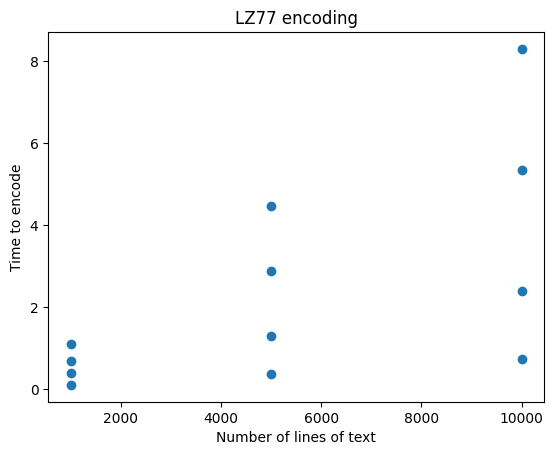

In [56]:
def evaluate_lz77(filename: str):
        """
        Function for evaluating Lz 77
        """
        text_sizes = [1000, 5000,10000]
        offsets = [(10, 10), (100, 100),(300,300),(500,500)]
        times=[]
        with open(filename, "r", encoding="utf-8") as file:
            text = file.read().split("\n")
        for size in text_sizes:
            for offset in offsets:
                start1 = time.time()
                compressor = Lz77("".join(text[:size]), offset[0], offset[1])
                compressor.lz77_encode()
                end1 = time.time()
                time_encode = end1 - start1
                assert compressor.decodelz77() == "".join(text[:size])
                print(f"{str(compressor.count_compressing())}% стиснення для таких блоків ({offset[0]} ,{offset[1]}), для такого розміру {size}")
                times.append((size, time_encode))
        times = numpy.array(times)
        x = times[:, 1]
        y = times[:, 0]
        plt.scatter(y, x)
        plt.ylabel("Time to encode")
        plt.xlabel("Number of lines of text")
        plt.title("LZ77 encoding")
        plt.show()
evaluate_lz77("text.txt")

Conclusion:

На графіку можна побачити що час виконанння алгоритму стисту сильно залежить від величину блоку пошуку та величини переднього блоку. Також можна помітити що зі збільшенням величину блоку пошуку та величини переднього блоку збільшується величина стиску. Можна досягти ща більшого стиску якщо збільшити розміри блоків ще більше, але це буду сильно впливати на час виконання.

**Deflate algorithm:**

In [59]:
class Deflate:
    """
    Performs the Delfate algorithm
    >>> defl=Deflate("test")
    >>> defl.encode()
    '110110100001101101011001101101001010111010100'
    >>> assert defl.decode()=="test"
    """

    def __init__(self, data):
        """
        Initial method
        """
        self.data = data
        self.special_0 = "⌇"
        self.special_1 = "˚"
        self.haffman = object

    def encode(self) -> str:
        """
        Encoding the string by combination LZ77 and Huffman algorithms.
        """
        lz77 = Lz77(self.data, 100, 100)
        code = lz77.lz77_encode()
        code_str = (
            str(code)
            .replace("[", "")
            .replace("]", "")
            .replace(")", "")
            .replace("(", "")
            .replace("'", "")
            .replace(", ",",")
            .replace("0", self.special_0)
            .replace("1", self.special_1)
        )
        haffman = HuffmanCode(code_str)
        self.haffman = haffman
        prob = haffman.calculate_frequency()
        haffman.encode_start(prob)
        haffman.encode()
        return self.haffman.code

    def decode(self) -> str:
        """
        Decode deflate algorithm.
        """
        lz_str = str(
            self.haffman.decode()
            .replace(self.special_0, "0")
            .replace(self.special_1, "1")
        )
        return Lz77.decode_from_str(lz_str)

    def compare_compression(self) -> float:
        """
        Compare compression of Deflate algorithm.
        """
        return 100-(len(self.haffman.code)/(len(self.data))*8)

TestResults(failed=0, attempted=50)


14.779200000000003% стиснення для таких блоків (100 ,100), для такого розміру 10000
14.649600000000007% стиснення для таких блоків (100 ,100), для такого розміру 20000
14.555520000000001% стиснення для таких блоків (100 ,100), для такого розміру 50000
14.769679999999994% стиснення для таких блоків (100 ,100), для такого розміру 100000


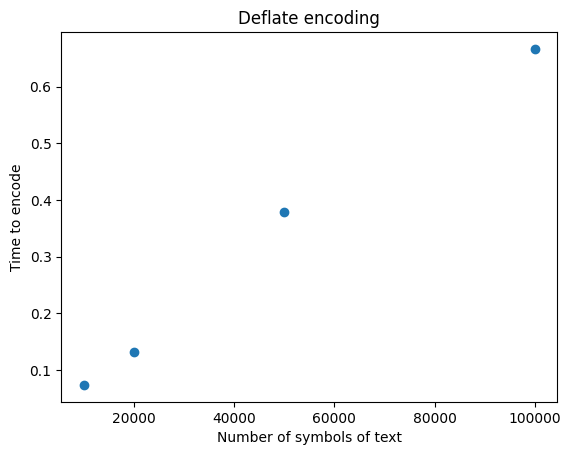

In [61]:
def evaluate_deflate():
        text_sizes = [10000,20000,50000,100000]
        times=[]
        for size in text_sizes:  
            start1 = time.time()
            text_generated=str(''.join(random.choices(string.ascii_lowercase + string.digits, k = size)))
            compressor = Deflate(text_generated)
            compressor.encode()
            end1 = time.time()
            time_encode = end1 - start1

            assert compressor.decode() == text_generated
            print(f"{str(compressor.compare_compression())}% стиснення для таких блоків (100 ,100), для такого розміру {size}")
            times.append((size, time_encode))
        times = numpy.array(times)
        x = times[:, 1]
        y = times[:, 0]
        plt.scatter(y, x)
        plt.ylabel("Time to encode")
        plt.xlabel("Number of symbols of text")
        plt.title("Deflate encoding")
        plt.show()
evaluate_deflate()

Conclusion

Через те що кожен символ тексту генерується окремо то алгоритм стиску не може знайти блоки для копіювання, але всеж deflate є набагато ефективніший за lz 77 і може зменшити розмір навіть в таких ситуаціях.

**Conclusions:**

Now let`s compare encoding of all the above algorithms on the book 'Chorna Rada' and decide, which of them works faster and more effective.

In [63]:
data = open_file('ChornaRada.txt')

lzw = Lzw(data)
start1 = time.time()
code_lzw = lzw.encode()
end1 = time.time()
lzw_time = end1 - start1
print('LZW code time:', lzw_time)

huffman = HuffmanCode(data)
start2 = time.time()
prob = huffman.calculate_frequency()
code = huffman.encode_start(prob)
code_huffman = huffman.encode()
end2 = time.time()
huffman_time = end2 - start2
print('Huffman code time:', huffman_time)

lz77 = Lz77(data, 5, 5)
start3 = time.time()
code_lz77 = lz77.lz77_encode()
end3 = time.time()
lz77_time = end3 - start3
print('LZ77 time:', lz77_time)

deflate = Deflate(data)
start4 = time.time()
code_deflate = deflate.encode()
end4 = time.time()
deflate_time = end4 - start4
print('Deflate time:', deflate_time)


LZW code time: 176.1288275718689
Huffman code time: 0.2631378173828125
LZ77 time: 1.2296783924102783
Deflate time: 6.806949615478516


- LZW works well for compressing text and image files containing repeated patterns, as it can achieve good compression ratios. It is often used in the GIF image format.
- LZ77 is effective for compressing text files and works well when there are many repeated patterns in the data. Now it is often used in the Deflate algorithm, which is used in the ZIP and gzip file formats.
- Huffman coding works well for compressing text files and other data types where certain symbols occur more frequently than others.
- Deflate works well for compressing a wide range of data types, including text, images, and other binary data.